In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Define constants
IMG_HEIGHT = 255
IMG_WIDTH = 255
batch_size = 32
epochs = 10

In [3]:

# Data preprocessing
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    directory='D:/data set/cat-dog/training_set/training_set',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [5]:
ann = Sequential()

In [6]:
ann.add(Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
ann.compile(
    optimizer = "Adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
ann.fit(train_generator, batch_size = 32, epochs=100)

Epoch 1/100
251/251 [==============================] - 21s 81ms/step - loss: 0.7252 - accuracy: 0.4961
Epoch 2/100
251/251 [==============================] - 22s 88ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 3/100
251/251 [==============================] - 28s 111ms/step - loss: 0.6932 - accuracy: 0.4944
Epoch 4/100
251/251 [==============================] - 28s 113ms/step - loss: 0.6932 - accuracy: 0.4914
Epoch 5/100
251/251 [==============================] - 28s 113ms/step - loss: 0.6932 - accuracy: 0.4966
Epoch 6/100
251/251 [==============================] - 22s 89ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 7/100
251/251 [==============================] - 24s 96ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 8/100
251/251 [==============================] - 27s 107ms/step - loss: 0.6932 - accuracy: 0.4928
Epoch 9/100
251/251 [==============================] - 51s 201ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 10/100
251/251 [==============================] - 39s 153ms/st

In [11]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    directory='D:/data set/cat-dog/test_set/test_set',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [13]:
y_pred = ann.predict(test_generator)
y_pred = (y_pred > 0.5)

64/64 [==============================] - 10s 146ms/step


In [15]:
from sklearn.metrics import accuracy_score

In [17]:
y_test_flat = test_generator.classes
y_pred_flat = y_pred.flatten()

accuracy = accuracy_score(y_test_flat, y_pred_flat)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.49975284231339595


In [25]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

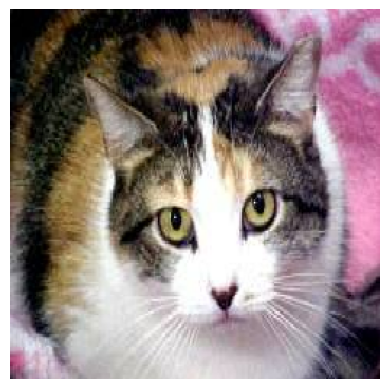

1/1 [==============================] - 0s 119ms/step
Predicted class: Cat


In [27]:
def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(255, 255))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

image_path = "D:/data set/cat-dog/test_set/test_set/cats/cat.4137.jpg"
predicted_class = predict_image_class(image_path, ann)
print("Predicted class:", predicted_class)